In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
max_period = 50
num_choices = 2

min_prob = .72
max_prob = .82
num_probs = 200

max_streak = max_period
num_states = max_streak + 1

## Get array of choices and possible states
streaks = np.array(range(0, num_states))
choices = np.array(range(0, num_choices))
probs = np.linspace(min_prob, max_prob, num_probs)
probs_plus_1 = np.concatenate((probs , np.array([1])))

In [55]:
## Calculate matrices
choices_mat, streaks_mat ,probs_mat = np.meshgrid(choices, streaks,  probs)

## Streak Updating
# If don't make pick
streaks_stay_mat = streaks_mat[:, 0, :]

# If make pick and win
streaks_win_mat = np.minimum(streaks_mat[:, 1, :] + 1, max_period)

# If make pick and lose
streaks_lose_mat = np.zeros((num_states, num_probs), dtype='int')


#### Probs updating
probs_space = np.tile(range(0, num_probs), (num_states, 1))

Opts = {}
V_funcs = {}
G_funcs = {}
Cutoffs = {}

## Value function in Last peripd is just the streak state
V_funcs['V' + str(max_period)] = streaks_mat[:, 0, :]

In [56]:
for period in range(max_period-1, -1, -1):
    next = period + 1
    next_V = V_funcs['V' + str(next)]
    
    Exp = np.zeros((num_states, num_choices, num_probs))
    
    Exp_V_stay = np.mean(next_V[streaks_stay_mat, probs_space], axis=1)
    Exp[:, 0, :] = np.tile(Exp_V_stay, (num_probs, 1)).T
    
    Exp_V_win = np.mean(next_V[streaks_win_mat, probs_space], axis=1)
    Exp_V_lose = np.mean(next_V[streaks_lose_mat, probs_space], axis=1)
    
    Exp[:, 1, :] = (
        np.outer(Exp_V_win, probs_mat[0, 1, :]) + 
        np.outer(Exp_V_lose, (1-probs_mat[0, 1, :]))
    )
    
    G_funcs['G' + str(period)] = np.array(np.argmax(Exp, axis=1), dtype=float)
    G_funcs['G' + str(period)][next:, :] = np.nan
    V_funcs['V' + str(period)] = np.array(np.amax(Exp, axis=1), dtype=float)
    V_funcs['V' + str(period)][next:, :] = np.nan
    
    cutoff_idx = np.array(num_probs - np.sum(G_funcs['G' + str(period)], axis=1))
    opt_streaks = streaks[~np.isnan(cutoff_idx)]
    cutoff_idx = cutoff_idx[~np.isnan(cutoff_idx)]
    cutoff_idx = np.array(cutoff_idx, dtype=int)
    opt_probs = probs_plus_1[cutoff_idx]

    cutoff = np.vstack((opt_streaks, opt_probs))
    Cutoffs['C' + str(period)] = cutoff

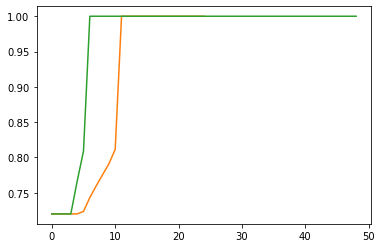

In [57]:
for p in range(0, max_period, 24):
    plt.plot(Cutoffs['C' + str(p)][0,:], Cutoffs['C' + str(p)][1,:])
plt.show()

In [58]:
est_val = V_funcs['V0'][0, 0]
print(est_val)

7.577052730376568


In [59]:
Cutoffs['C' + str(p)]

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
        10.        , 11.        , 12.        , 13.        , 14.        ,
        15.        , 16.        , 17.        , 18.        , 19.        ,
        20.        , 21.        , 22.        , 23.        , 24.        ,
        25.        , 26.        , 27.        , 28.        , 29.        ,
        30.        , 31.        , 32.        , 33.        , 34.        ,
        35.        , 36.        , 37.        , 38.        , 39.        ,
        40.        , 41.        , 42.        , 43.        , 44.        ,
        45.        , 46.        , 47.        , 48.        ],
       [ 0.72      ,  0.72      ,  0.72      ,  0.72      ,  0.76623116,
         0.80894472,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.

In [8]:
# MaxStreak(t) = max(MaxStreak(t-1), CurrentStreak(t))
# CurrentStreak(t) = CurrentStreak(t-1) + H(t)

# V(MaxStreak(T), CurrentStreak(T), p(T)) = MaxStreak
# V(MaxStreak, CurrentStreak, T-1, p(t-1)) = argmax(s , E(V(MaxStreak(T), CurrentStreak(T), p(T))))

# v(MaxStreak, CurrentStreak, t, p) = max(MaxStreak, CurrentStreak) + E(V(MaxStreak, CurrentStreak, t+1, H))